In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [103]:
image = cv2.imread("Images/table17verticalCropped.jpg")
image = cv2.resize(image, (0, 0), fx = 0.5, fy = 0.5)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
imgCanny = cv2.Canny(gray,150,50)
blur = cv2.GaussianBlur(gray, (7, 7), 1)
imgCannyBlur = cv2.Canny(blur,150,50)


In [100]:
def detect_plates(image_path, min_area=1800, scale_by=0.5, threshold=180, canny_upper=150, canny_lower=50, show=False):
    # preprocess
    image = cv2.imread(image_path)
    image = cv2.resize(image, (0, 0), fx = scale_by, fy = scale_by)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_TOZERO) # consider other types of thresholding
    can = cv2.Canny(thresh, canny_upper, canny_lower)

    #find the contours
    contours,hierarchy = cv2.findContours(can,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    found_plates = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        # print(area)
        if area > min_area:
            # cv2.drawContours(orig, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            if objCor > 6: 
                objectType = "plate"
                found_plates.append((cnt, approx))
            else: objectType = "None"
            if show:
                cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
                cv2.putText(orig,objectType,
                            (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                            (0,0,0),2)
    if show:
        plt.figure(figsize = (12,16))
        plt.imshow(orig, aspect='equal')
    return found_plates

8
[[[ 111 1141]]

 [[ 111 1142]]

 [[ 110 1143]]

 ...

 [[ 110 1144]]

 [[ 110 1143]]

 [[ 111 1142]]]
9
[[[ 724 1091]]

 [[ 724 1092]]

 [[ 723 1093]]

 [[ 723 1094]]

 [[ 723 1095]]

 [[ 723 1096]]

 [[ 723 1097]]

 [[ 723 1098]]

 [[ 722 1099]]

 [[ 722 1100]]

 [[ 722 1101]]

 [[ 722 1102]]

 [[ 722 1103]]

 [[ 722 1104]]

 [[ 722 1105]]

 [[ 722 1106]]

 [[ 722 1107]]

 [[ 723 1108]]

 [[ 723 1109]]

 [[ 723 1110]]

 [[ 723 1111]]

 [[ 722 1112]]

 [[ 721 1112]]

 [[ 720 1113]]

 [[ 719 1114]]

 [[ 718 1115]]

 [[ 717 1116]]

 [[ 716 1116]]

 [[ 715 1117]]

 [[ 714 1118]]

 [[ 714 1119]]

 [[ 713 1120]]

 [[ 714 1119]]

 [[ 715 1120]]

 [[ 715 1121]]

 [[ 714 1122]]

 [[ 713 1123]]

 [[ 712 1122]]

 [[ 711 1123]]

 [[ 710 1124]]

 [[ 710 1125]]

 [[ 710 1126]]

 [[ 711 1127]]

 [[ 710 1128]]

 [[ 711 1127]]

 [[ 712 1126]]

 [[ 712 1125]]

 [[ 713 1124]]

 [[ 713 1123]]

 [[ 714 1122]]

 [[ 715 1121]]

 [[ 715 1120]]

 [[ 716 1119]]

 [[ 717 1119]]

 [[ 717 1118]]

 [[ 718 1117]]

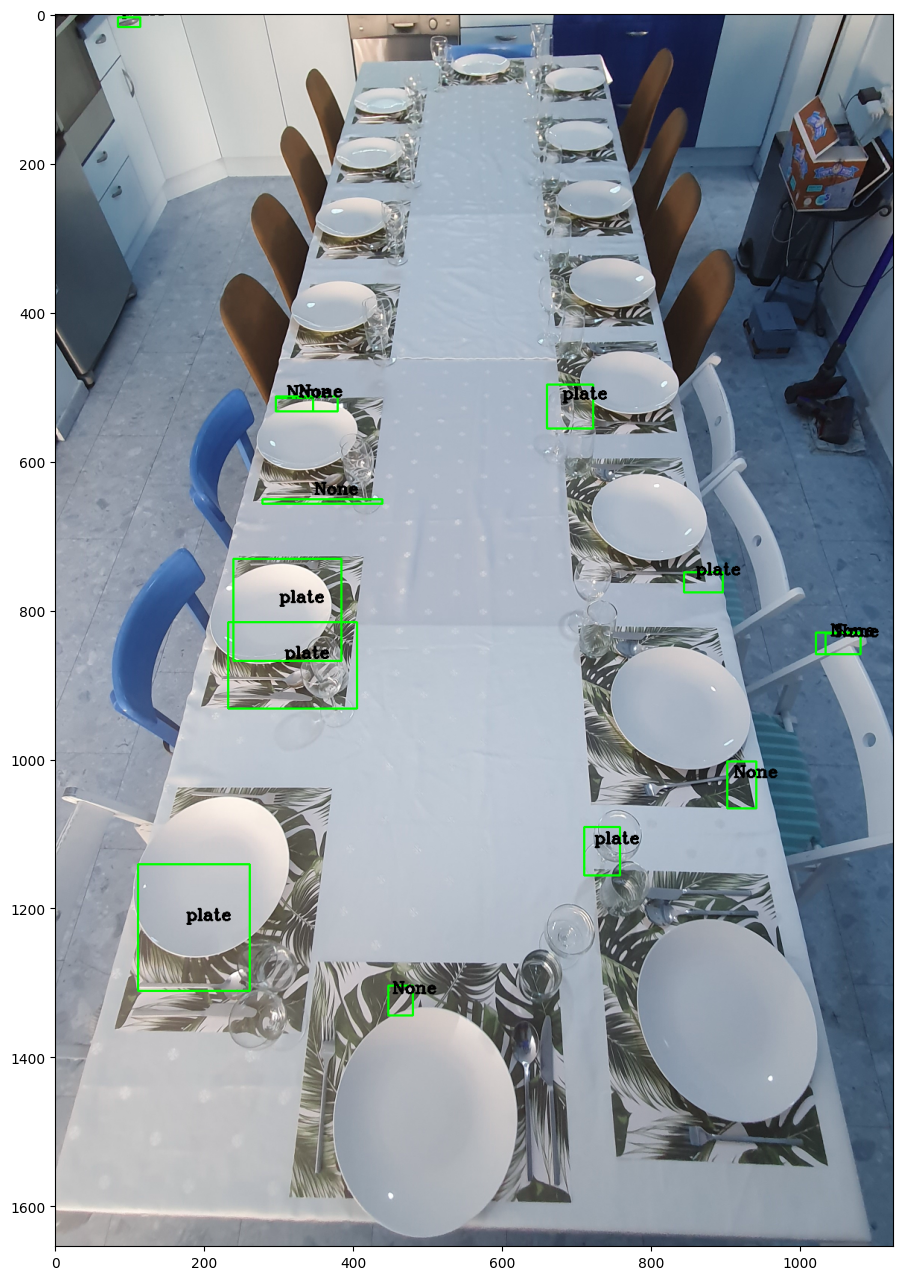

In [110]:
conts = detect_plates("Images/table17verticalCropped.jpg", min_area=200, show=True)

In [97]:
len(conts)

6

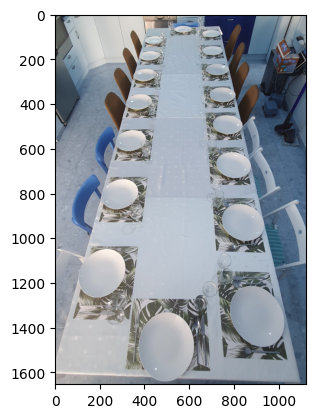

In [104]:
img_cont = image.copy()
cv2.drawContours(img_cont, [c[0] for c in conts], -1, (0, 255, 0), 2)
cv2.drawContours(img_cont, [c[1] for c in conts], -1, (255, 0, 0), 2)
plt.figure()
plt.imshow(img_cont, aspect='equal')

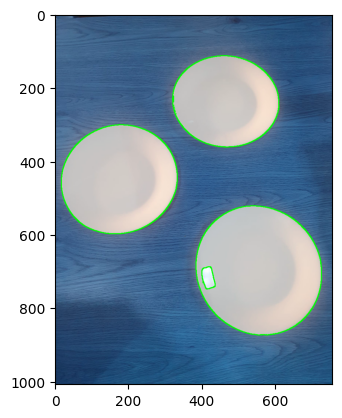

In [81]:
th3 = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
_, thresh4 = cv2.threshold(gray,180,255,cv2.THRESH_TOZERO)
_, thresh1 = cv2.threshold(gray,180,255,cv2.THRESH_BINARY)
can = cv2.Canny(thresh4, 150, 50)
contours,hierarchy = cv2.findContours(can,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
img_cont = image.copy()
cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2)

plt.figure()
plt.imshow(img_cont, cmap='gray', aspect='equal')

8
8
8
8
8
8


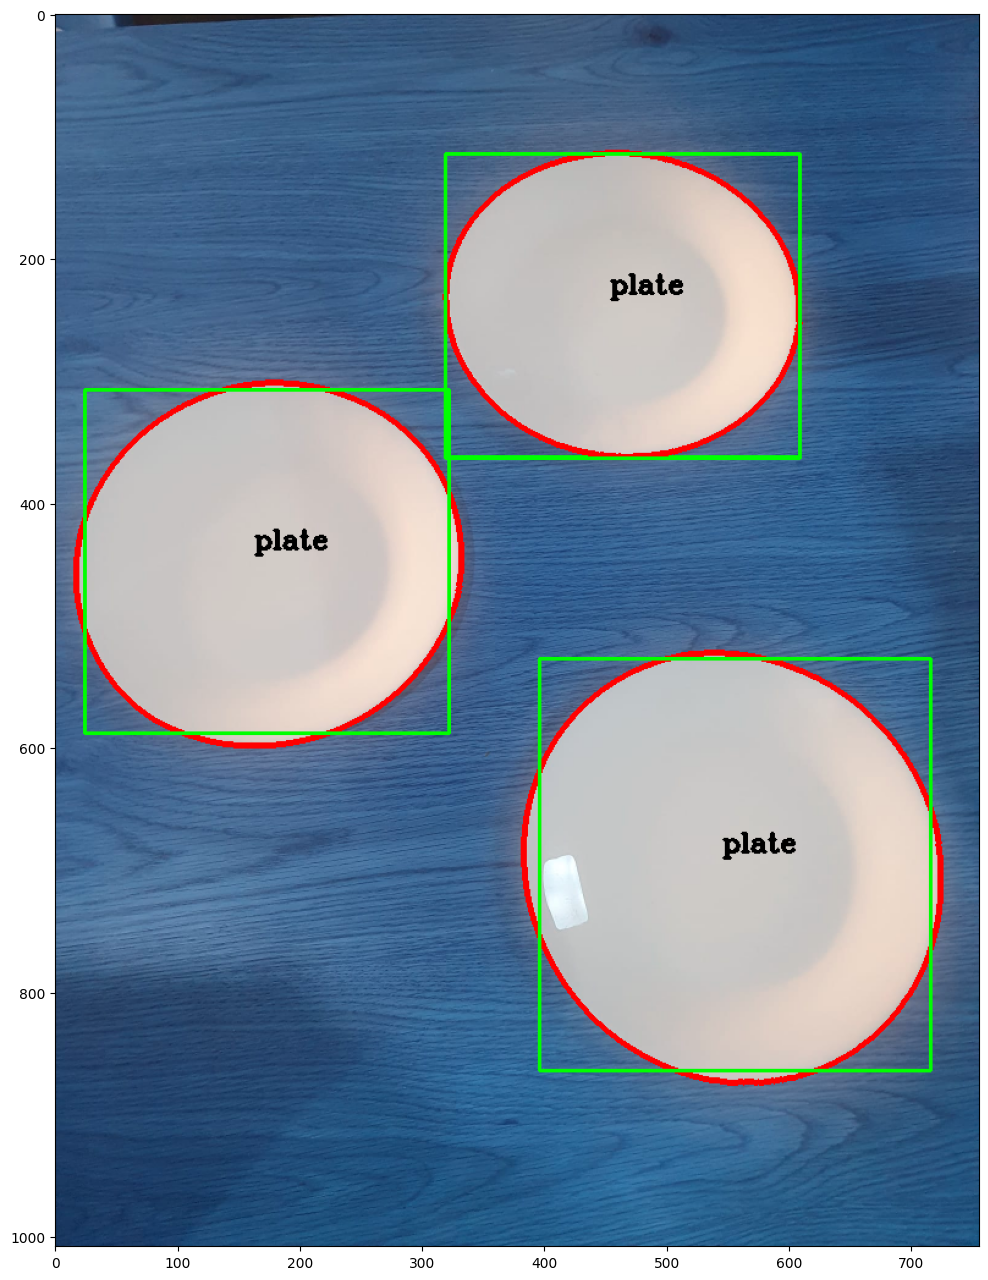

In [82]:
getContours(can, image.copy(), 2000)

In [72]:
def getContours(image, orig, min_area=1000):
    contours,hierarchy = cv2.findContours(image,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    for cnt in contours:
        area = cv2.contourArea(cnt)
        # print(area)
        if area > min_area:
            cv2.drawContours(orig, cnt, -1, (255, 0, 0), 3)
            peri = cv2.arcLength(cnt,True)
            #print(peri)
            approx = cv2.approxPolyDP(cnt,0.02*peri,True)
            print(len(approx))
            objCor = len(approx)
            x, y, w, h = cv2.boundingRect(approx)
            if objCor > 5: objectType = "plate"
            else: objectType = "None"

            cv2.rectangle(orig,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(orig,objectType,
                        (x+(w//2)-10,y+(h//2)-10),cv2.FONT_HERSHEY_COMPLEX,0.7,
                        (0,0,0),2)
    plt.figure(figsize = (12,16))
    plt.imshow(orig, aspect='equal')

1424.0
6
1457.5
7
0.0
2.0
12.5
91665.0
8
91942.0
8
2.0
4.0
7.5
33.5
5.5
30.5
58.0
25.0
7.5
12.5
14.5
19.5
247.5
13
47312.0
8
47510.0
8


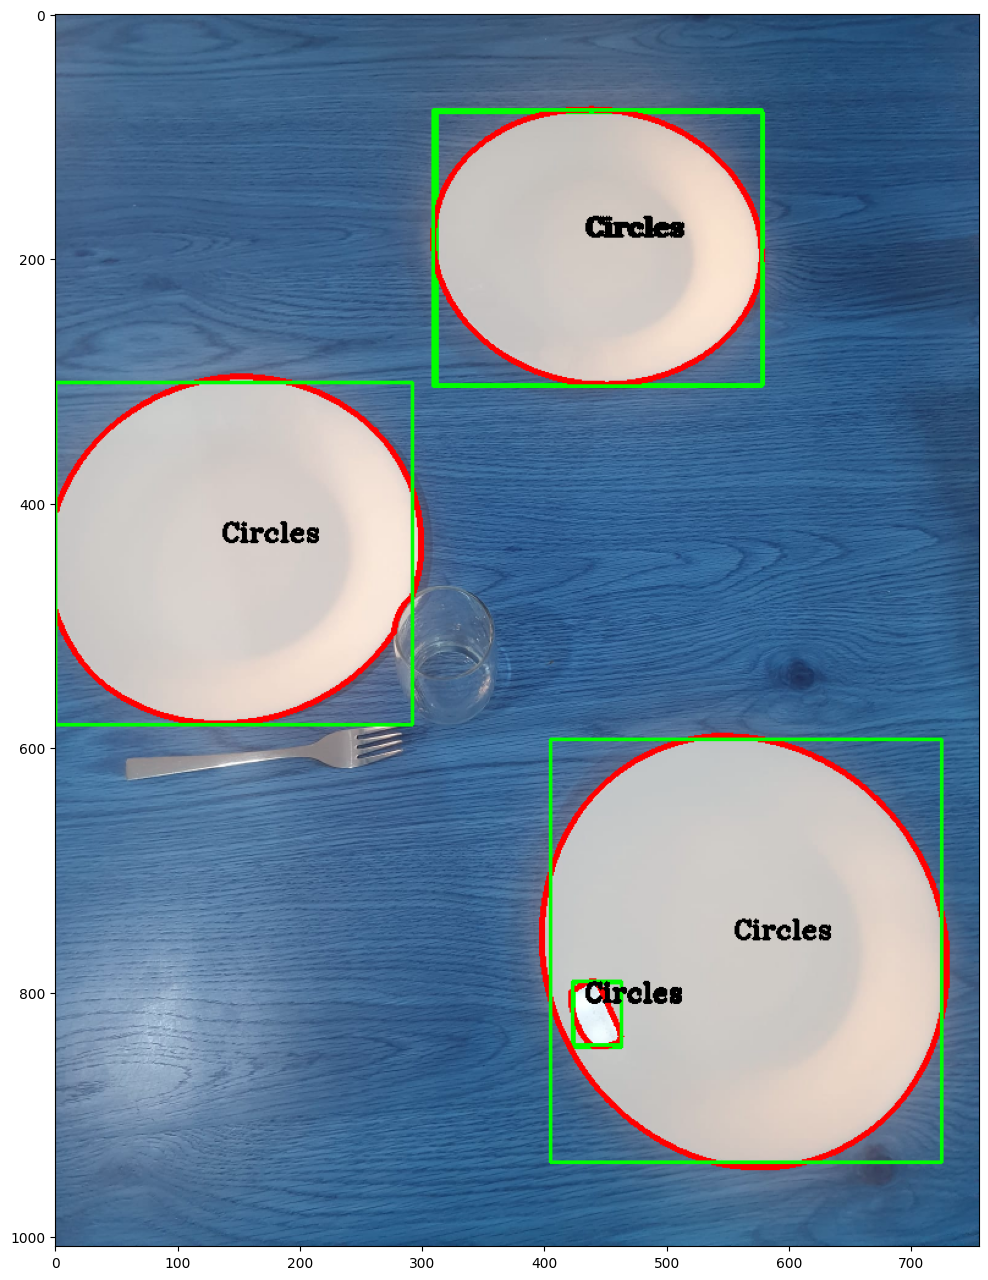

In [30]:
getContours(imgCannyBlur, image.copy())

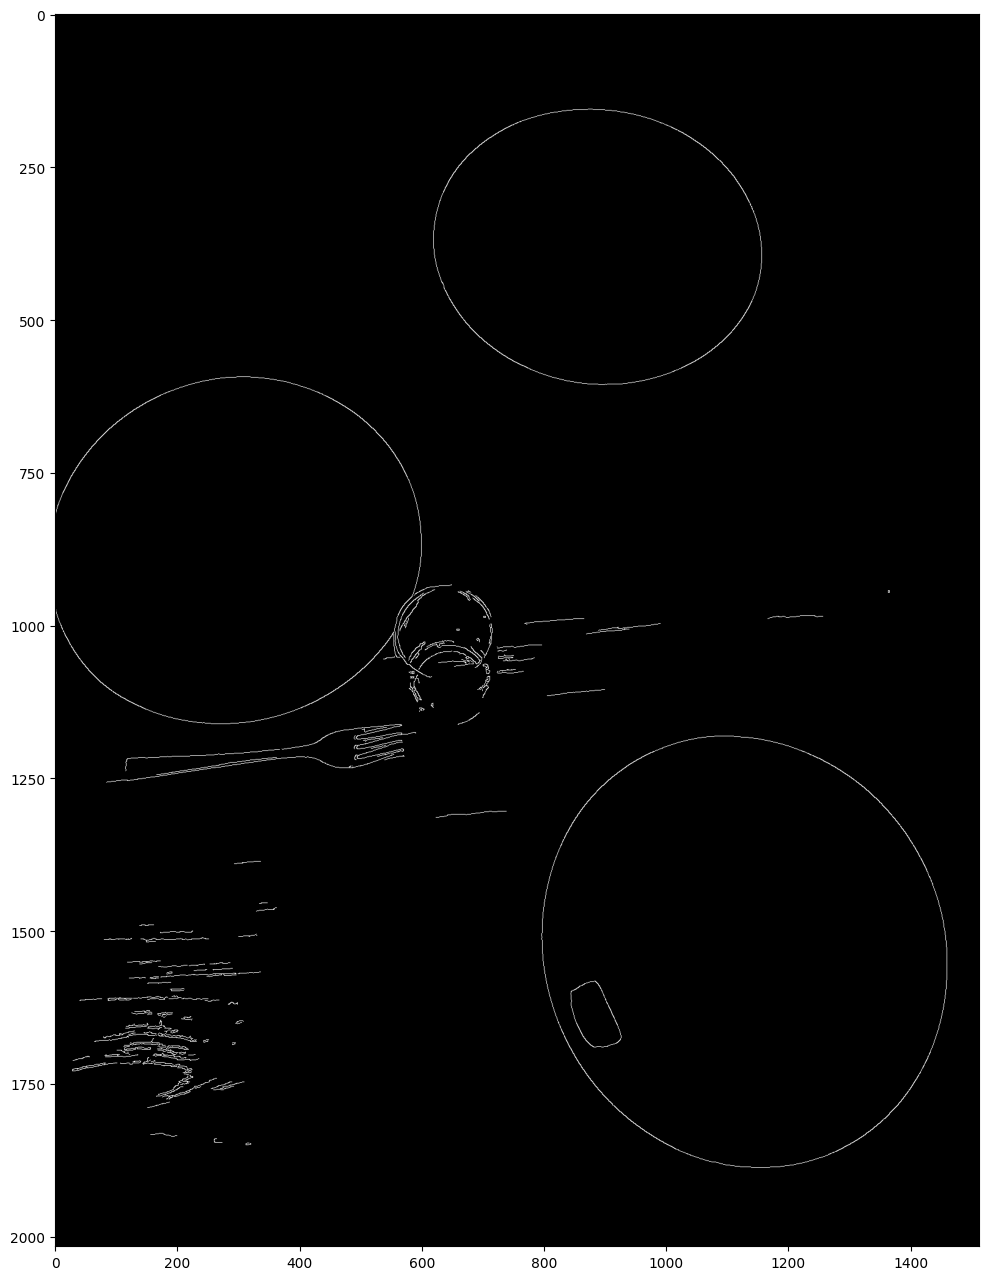

In [17]:
plt.figure(figsize = (12,16))
plt.imshow(imgCannyBlur, cmap='gray', aspect='equal')

In [ ]:
thresholded = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)

In [32]:
contours, heirarchy = cv2.findContours(imgCannyBlur, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [33]:
img_cont = image.copy()
cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2)
cv2.imshow("Image", img_cont)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
def on_trackbar_change(v):
    _, threshold = cv2.threshold(gray, 151, 255, cv2.THRESH_BINARY) 
    canny = cv2.Canny(threshold,v,T2)
    
    contours, heirarchy = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    img_cont = image.copy()
    cv2.drawContours(img_cont, contours, -1, (0, 255, 0), 2)
    cv2.imshow(title_window, img_cont)

def empty(val):
    pass


def on_thresh_change(v):
    _, threshold = cv2.threshold(gray, v, 255, cv2.THRESH_BINARY) 
    cv2.imshow(title_window, threshold)


T1, T2 = 100, 100
thresh = 130

title_window = "dinnerTable"
cv2.namedWindow(title_window)
cv2.createTrackbar("canny T1", title_window , 100, 500, on_trackbar_change)
# cv2.createTrackbar("canny T2", title_window , 100, 500, empty)
cv2.createTrackbar("threshold", title_window , 0, 255, on_thresh_change)


on_trackbar_change(T1)
cv2.waitKey(0)



-1

In [5]:
_, threshold = cv2.threshold(gray, 170, 255, cv2.THRESH_BINARY) 
cv2.imshow(title_window, threshold)

: 

In [5]:
# gemini suggested code
import cv2

def detect_plates(image):
  # Convert image to grayscale for better color processing
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Apply adaptive thresholding to handle uneven lighting
  thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                 cv2.THRESH_BINARY_INV, 11, 2)

  # Find contours in the thresholded image
  contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Initialize variables
  plates = []

  # Loop through contours
  for cnt in contours:
    # Get contour area and approximate polygon
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)

    # Check if contour has 4 sides (rectangular) and minimum area
    if len(approx) == 4 and area > 1000:
      # Get bounding rectangle of the plate
      x, y, w, h = cv2.boundingRect(cnt)
      plates.append((x, y, w, h))
      # You can optionally draw the rectangle on the image here
      # cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  return len(plates), plates

# Example usage
image = cv2.imread("Images/table17verticalCropped.jpg")
num_plates, contours = detect_plates(image)

print(f"Number of plates detected: {num_plates}")

# Display the image with optional rectangle overlays (commented out)
# cv2.imshow("Plates", image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


Number of plates detected: 3


In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model(['Images/3platesToo.jpeg', 'Images/plateAndFork.jpeg'])  # return a list of Results objects


0: 640x640 1 dining table, 3 mouses, 49.5ms
1: 640x640 1 fork, 1 dining table, 49.5ms
Speed: 0.0ms preprocess, 49.5ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


In [10]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    # result.save(filename='result.jpg')  # save to disk

In [ ]:
results = model(['Images/tableFor3.jpeg']) 
for result in results:
    result.show()
